# Food Retail

## Issues to be presented
1. Revenue overview between geography 1 and 2
2. Does the timing correlate with sales?
3. Each product is suitable for which display and which feature by geography
4. Top and lowest-selling brands by product and geography
5. Advice for improving retail business

### Step 1: Prepare Data

source data : https://drive.google.com/drive/folders/1ZwsDfkcM7SG-K-ajWneBoAEEjilFM16X?usp=sharing

In [1]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import CSV file
causal = pd.read_csv('dh_causal_lookup.csv')
product = pd.read_csv('dh_product_lookup.csv')
trans = pd.read_csv('dh_transactions.csv')

In [4]:
causal.head()

,upc,store,week,feature_desc,display_desc,geography
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1
1,5100001212,1,66,Wrap Back Feature,Not on Display,1
2,5100002792,1,72,Interior Page Feature,Not on Display,1
3,3620000300,1,55,Wrap Interior Feature,Not on Display,1
4,4112907742,1,68,Wrap Interior Feature,Not on Display,1


In [6]:
product.head()

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ


In [7]:
trans.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [3]:
# merge dataframe
# inner join -> causal and trans
data = pd.merge(causal[['upc', 'week', 'feature_desc', 'display_desc', 'geography', 'store']],
                trans[['upc', 'dollar_sales', 'units', 'geography', 'week', 'store']],
                on = ['upc', 'store', 'geography', 'week'])

In [4]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381746 entries, 0 to 381745
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   upc           381746 non-null  int64  
 1   week          381746 non-null  int64  
 2   feature_desc  381746 non-null  object 
 3   display_desc  381746 non-null  object 
 4   geography     381746 non-null  int64  
 5   store         381746 non-null  int64  
 6   dollar_sales  381746 non-null  float64
 7   units         381746 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 26.2+ MB


In [5]:
# left join -> data and product
data = pd.merge(data,
                product[['upc', 'commodity', 'brand']],
                how = 'left',
                on = 'upc')

In [14]:
data.head()

,upc,week,feature_desc,display_desc,geography,store,dollar_sales,units,commodity,brand
0,3620000300,55,Wrap Interior Feature,Not on Display,1,1,1.5,1,pasta sauce,Ragu
1,4112907742,68,Wrap Interior Feature,Not on Display,1,1,2.0,1,pasta sauce,Classico
2,4420979129,66,Interior Page Feature,Not on Display,1,1,2.5,1,syrups,Mrs Butterworth
3,3620001375,56,Interior Page Line Item,Not on Display,1,1,1.5,1,pasta sauce,Ragu
4,4112907700,68,Wrap Interior Feature,Not on Display,1,1,2.0,1,pasta sauce,Classico


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381746 entries, 0 to 381745
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   upc           381746 non-null  int64  
 1   week          381746 non-null  int64  
 2   feature_desc  381746 non-null  object 
 3   display_desc  381746 non-null  object 
 4   geography     381746 non-null  int64  
 5   store         381746 non-null  int64  
 6   dollar_sales  381746 non-null  float64
 7   units         381746 non-null  int64  
 8   commodity     381746 non-null  object 
 9   brand         381746 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 32.0+ MB


In [7]:
# drop column store
data = data.drop('store', axis = 1)
data.head()

,upc,week,feature_desc,display_desc,geography,dollar_sales,units,commodity,brand
0,3620000300,55,Wrap Interior Feature,Not on Display,1,1.5,1,pasta sauce,Ragu
1,4112907742,68,Wrap Interior Feature,Not on Display,1,2.0,1,pasta sauce,Classico
2,4420979129,66,Interior Page Feature,Not on Display,1,2.5,1,syrups,Mrs Butterworth
3,3620001375,56,Interior Page Line Item,Not on Display,1,1.5,1,pasta sauce,Ragu
4,4112907700,68,Wrap Interior Feature,Not on Display,1,2.0,1,pasta sauce,Classico


In [8]:
# create column -> revenue
data['revenue'] = data.dollar_sales * data.units
data.head()

,upc,week,feature_desc,display_desc,geography,dollar_sales,units,commodity,brand,revenue
0,3620000300,55,Wrap Interior Feature,Not on Display,1,1.5,1,pasta sauce,Ragu,1.5
1,4112907742,68,Wrap Interior Feature,Not on Display,1,2.0,1,pasta sauce,Classico,2.0
2,4420979129,66,Interior Page Feature,Not on Display,1,2.5,1,syrups,Mrs Butterworth,2.5
3,3620001375,56,Interior Page Line Item,Not on Display,1,1.5,1,pasta sauce,Ragu,1.5
4,4112907700,68,Wrap Interior Feature,Not on Display,1,2.0,1,pasta sauce,Classico,2.0


### Step 2: Plot graph

#### Overview between Geography 1 and 2

##### - total revenue and average revenue

In [9]:
# overview total revenue and average revenue
total_rev = data.groupby('geography')['revenue'].sum().reset_index()
total_rev.columns = ['geography', 'total_revenue']
total_rev

,geography,total_revenue
0,1,444338.59
1,2,530107.78


In [10]:
avg_rev = round(data.groupby('geography')['revenue'].mean().reset_index(), 2)
avg_rev.columns = ['geography', 'avg_revenue']
avg_rev

,geography,avg_revenue
0,1,2.48
1,2,2.61


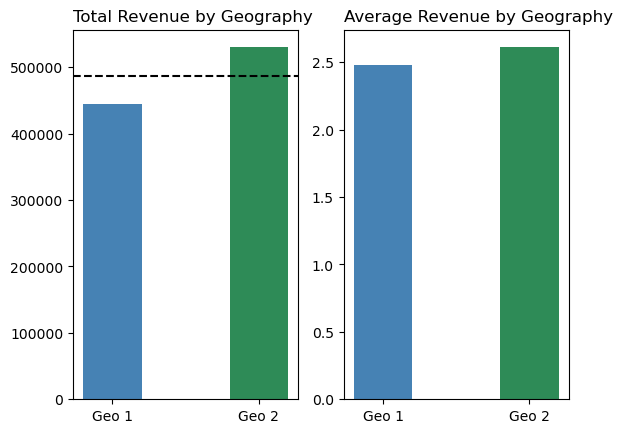

In [11]:
# plot bar chart
def intro1():
    fig = plt.figure()
    fig.add_subplot(121)
    x = total_rev['geography']
    y = total_rev['total_revenue']
    avg = sum(y)/2
    xtick = ('Geo 1', 'Geo 2')

    plt.bar(x, y, width=0.4, color=['steelblue', 'seagreen'])
    plt.xticks(x, xtick)
    plt.axhline(avg, color = 'k', linestyle = '--')
    plt.title('Total Revenue by Geography', loc='left');
    
    fig.add_subplot(122)
    x = avg_rev['geography']
    y = avg_rev['avg_revenue']
    xtick = ('Geo 1', 'Geo 2')

    plt.bar(x, y, width=0.4, color=['steelblue', 'seagreen'])
    plt.xticks(x, xtick)
    plt.title('Average Revenue by Geography', loc='left');
    
    plt.show()

if __name__ == '__main__':
    intro1()
    

From the first chart, we found that Geo 2 had more total revenue than Geo 1. The second chart also shows that the average revenue of Geo 2 is greater than that of Geo 1. Therefore, it was more suitable for marketing investments than Geo 1. Regarding which product should be invested in, it will be explained in the next section.

#### - Revenue split by week between Geography 1 and 2

In [12]:
week_rev = data.groupby(['geography', 'week'])['revenue'].sum().reset_index()
week_rev.columns = ['geography', 'week', 'total_revenue']
week_rev.head()

,geography,week,total_revenue
0,1,43,3397.08
1,1,44,12100.95
2,1,45,1580.44
3,1,46,8330.51
4,1,47,8757.85


In [13]:
week_rev1 = week_rev[week_rev['geography'] == 1]
week_rev2 = week_rev[week_rev['geography'] == 2]

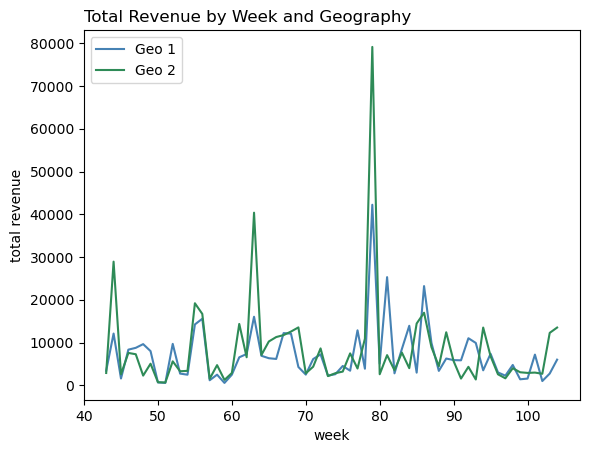

In [14]:
# plot line chart
def intro4():
    x = week_rev1['week']
    y = week_rev1['total_revenue']
    x2 = week_rev2['week']
    y2 = week_rev2['total_revenue']
    plt.plot(x, y, color = 'steelblue')
    plt.plot(x2, y2, color = 'seagreen')
    plt.xlabel('week')
    plt.ylabel('total revenue')
    plt.legend(['Geo 1', 'Geo 2'], loc = 'upper left')
    plt.title('Total Revenue by Week and Geography', loc='left');
    
    plt.show()
    
if __name__ == '__main__':
    intro4()
    

Before plotting the graph, we assumed that timing had an effect on product sales. But from the chart, we found that although at first the chart was a cycle graph, after the 79th week, sales did not rise. It can be assumed that timing has no effect on sales.

#### - Overview between Display and Average Revenue of Geography 1 and 2

In [15]:
# overview display
over_dis = data.groupby('display_desc')['revenue'].mean().reset_index().sort_values('revenue', ascending = True)
over_dis.columns = ['display', 'average_revenue']
over_dis

,display,average_revenue
5,Promo/Seasonal Aisle,2.155894
7,Secondary Location Display,2.408487
10,Store Rear,2.426305
3,Mid-Aisle End Cap,2.466920
4,Not on Display,2.510563
8,Side-Aisle End Cap,2.510645
0,Front End Cap,2.551299
1,In-Aisle,2.556891
6,Rear End Cap,2.637915
9,Store Front,2.691831


In [16]:
# overview feature
over_feat = data.groupby('feature_desc')['revenue'].mean().reset_index().sort_values('revenue', ascending = True)
over_feat.columns = ['feature', 'average_revenue']
over_feat

,feature,average_revenue
0,Back Page Feature,2.366664
7,Wrap Interior Feature,2.443062
4,Not on Feature,2.446857
2,Interior Page Feature,2.507349
6,Wrap Front Feature,2.547801
5,Wrap Back Feature,2.613472
3,Interior Page Line Item,2.778242
1,Front Page Feature,2.837066


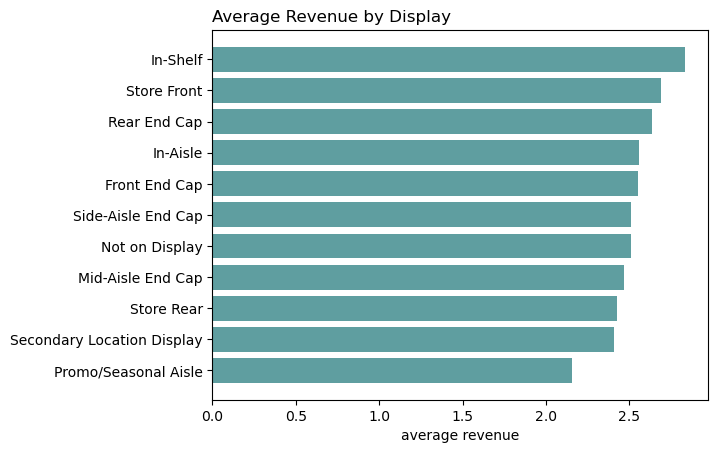

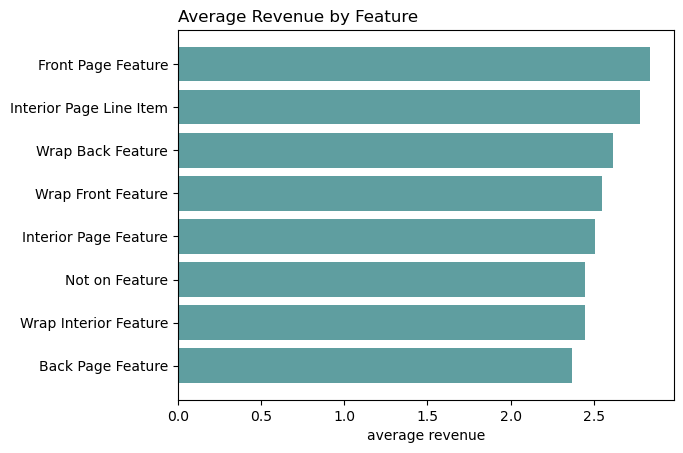

In [17]:
def intro2():
    x = over_dis['display']
    y = over_dis['average_revenue']
    plt.barh(x, y, color = 'cadetblue')
    plt.xlabel('average revenue')
    plt.title('Average Revenue by Display', loc='left'); 
    plt.show()
    
    x = over_feat['feature']
    y = over_feat['average_revenue']
    plt.barh(x, y, color = 'cadetblue')
    plt.xlabel('average revenue')
    plt.title('Average Revenue by Feature', loc='left');
    plt.show()

if __name__ == '__main__':
    intro2()

From the chart above, we found that the products on the shelf had the highest average revenue. While the products in the promo/seasonal aisle had the lowest average revenue. The second chart, the products with the front page feature had the highest average revenue and the products with back page feature had the lowest average revenue. But that doesn't mean all products should be in-shelf and they should be avoided at promo/seasonal aisle or the products should have front page features, and they should be avoided as back page features. The chart by product and geography below explains why

#### - Split by Product Sold between Geography 1 and 2

In [18]:
# overview products
over_pro = data.groupby(['commodity', 'geography'])['revenue'].mean().reset_index().sort_values('revenue', ascending = True)
over_pro.columns = ['product', 'geography', 'average_revenue']
over_pro

,product,geography,average_revenue
3,pasta,2,1.679922
2,pasta,1,1.924177
1,pancake mixes,2,2.199587
7,syrups,2,2.545358
4,pasta sauce,1,2.652638
6,syrups,1,2.737374
5,pasta sauce,2,3.064808
0,pancake mixes,1,4.154056


In [19]:
product1 = over_pro[over_pro['geography'] == 1]
product2 = over_pro[over_pro['geography'] == 2]

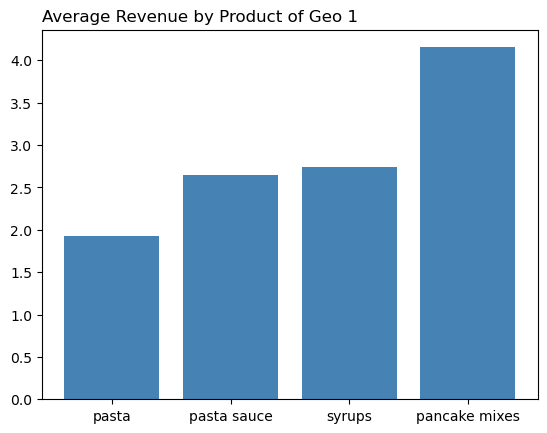

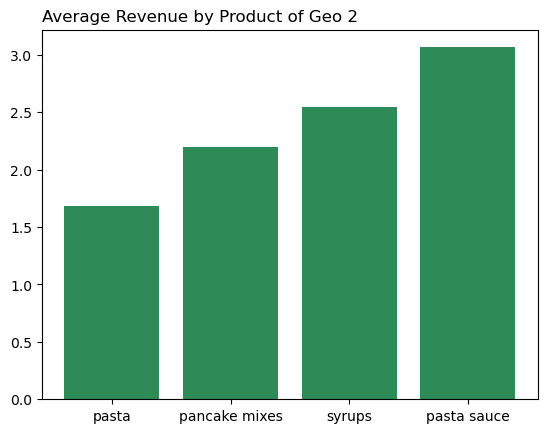

In [20]:
def intro3():
    x = product1['product']
    y = product1['average_revenue']
    plt.bar(x, y, color = 'steelblue')
    plt.title('Average Revenue by Product of Geo 1', loc='left');
    plt.show()

    x2 = product2['product']
    y2 = product2['average_revenue']
    plt.bar(x2, y2, color = 'seagreen')
    plt.title('Average Revenue by Product of Geo 2', loc='left');
    plt.show()

if __name__ == '__main__':
    intro3()

From the charts above, Geo 1's best-selling is the pancake mixes and Geo 2’s is the pasta sauce. The least-selling product of both Geo 1 and Geo 2 is pasta. For Geo 1, you should invest in pancake mixes; for Geo 2, you should invest in pasta sauce products.

#### Geography 1

**Display**

In [21]:
# average revenue by display and product in Geo 1
display = round(data.groupby(['commodity', 'geography', 'display_desc'])['revenue'].mean().reset_index().sort_values('revenue', ascending = True), 2)
display.columns = ['product', 'geo', 'display', 'avg_revenue']
display.head()

,product,geo,display,avg_revenue
19,pancake mixes,2,Side-Aisle End Cap,1.00
38,pasta,2,Promo/Seasonal Aisle,1.31
27,pasta,1,Promo/Seasonal Aisle,1.35
35,pasta,2,In-Shelf,1.43
17,pancake mixes,2,Rear End Cap,1.44


In [22]:
# filter geo
dis_geo1 = display[display['geo'] == 1]
dis_geo2 = display[display['geo'] == 2]

In [23]:
# filter product in geo 1
dis1_pancake = dis_geo1[dis_geo1['product'] == 'pancake mixes']
dis1_pasta = dis_geo1[dis_geo1['product'] == 'pasta']
dis1_sauce = dis_geo1[dis_geo1['product'] == 'pasta sauce']
dis1_syrups = dis_geo1[dis_geo1['product'] == 'syrups']

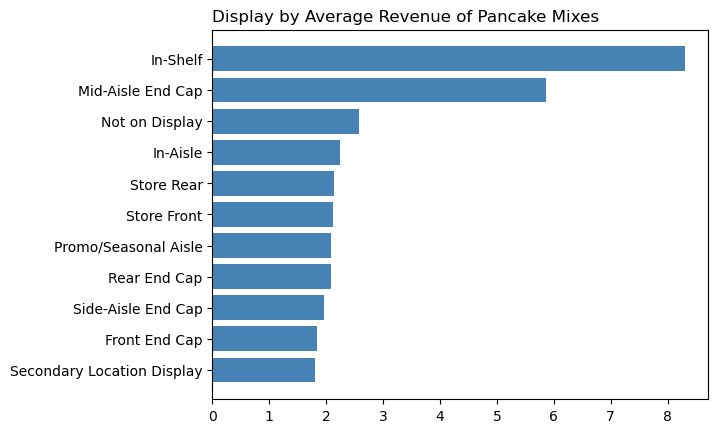

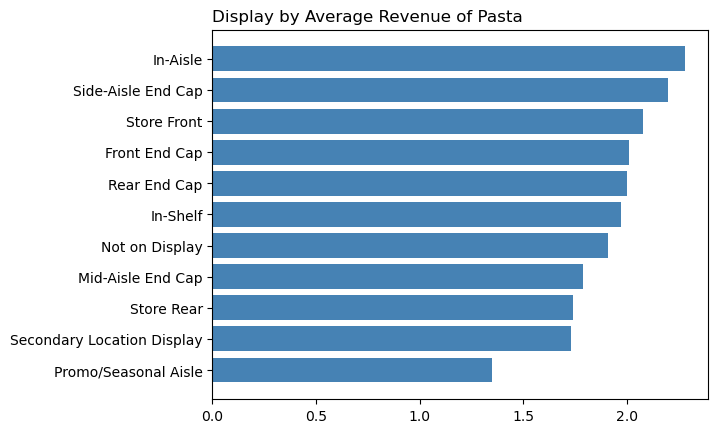

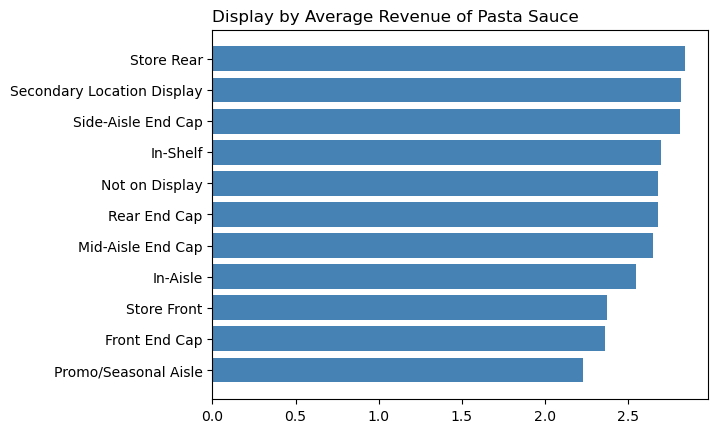

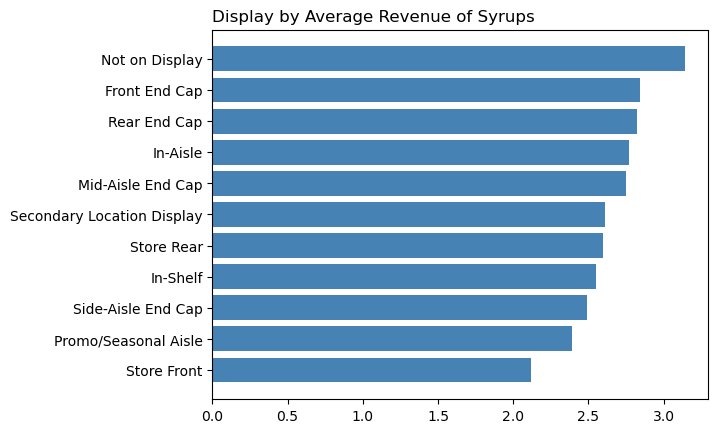

In [24]:
# plot graph
def intro5():
    x = dis1_pancake['display']
    y = dis1_pancake['avg_revenue']
    plt.barh(x, y, color = 'steelblue')
    plt.title('Display by Average Revenue of Pancake Mixes', loc='left');
    plt.show()

    x2 = dis1_pasta['display']
    y2 = dis1_pasta['avg_revenue']
    plt.barh(x2, y2, color = 'steelblue')
    plt.title('Display by Average Revenue of Pasta', loc='left');
    plt.show()
    
    x3 = dis1_sauce['display']
    y3 = dis1_sauce['avg_revenue']
    plt.barh(x3, y3, color = 'steelblue')
    plt.title('Display by Average Revenue of Pasta Sauce', loc='left');
    plt.show()
    
    x4 = dis1_syrups['display']
    y4 = dis1_syrups['avg_revenue']
    plt.barh(x4, y4, color = 'steelblue')
    plt.title('Display by Average Revenue of Syrups', loc='left');
    plt.show()

if __name__ == '__main__':
    intro5()

From the charts above, we found that
- Pancake mixes should be in-shelf, and they should be avoided in secondary location display.
- Pasta should be in-aisle, and they should be avoided at promo/seasonal aisle.
- Pasta sauce should be kept in the rear of the store, and they should be avoided at promo/seasonal aisle.
- Syrups should not be on display, and they should be avoided at store front.

**Feature**

In [25]:
feature = round(data.groupby(['commodity', 'geography', 'feature_desc'])['revenue'].mean().reset_index().sort_values('revenue', ascending = True), 2)
feature.columns = ['product', 'geo', 'feature', 'avg_revenue']
feature.head()

,product,geo,feature,avg_revenue
13,pasta,2,Back Page Feature,1.36
16,pasta,2,Not on Feature,1.49
15,pasta,2,Interior Page Feature,1.77
9,pasta,1,Not on Feature,1.79
8,pasta,1,Interior Page Feature,1.79


In [26]:
# filter feature
feat_geo1 = feature[feature['geo'] == 1]
feat_geo2 = feature[feature['geo'] == 2]

In [27]:
# filter product in geo 1
feat1_pancake = feat_geo1[feat_geo1['product'] == 'pancake mixes']
feat1_pasta = feat_geo1[feat_geo1['product'] == 'pasta']
feat1_sauce = feat_geo1[feat_geo1['product'] == 'pasta sauce']
feat1_syrups = feat_geo1[feat_geo1['product'] == 'syrups']

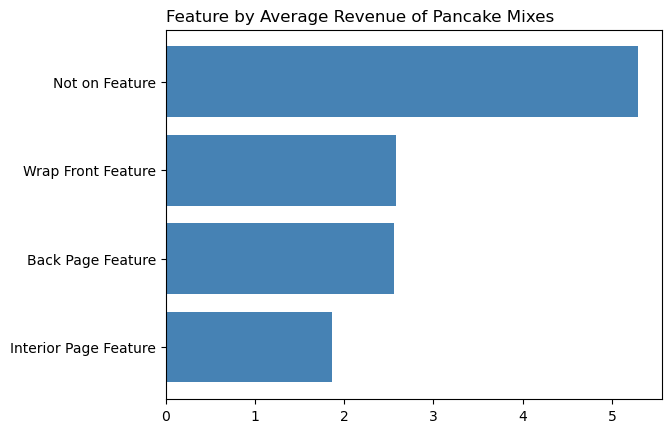

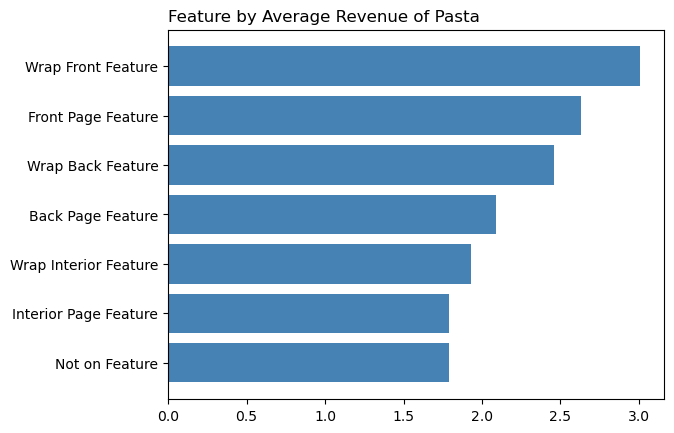

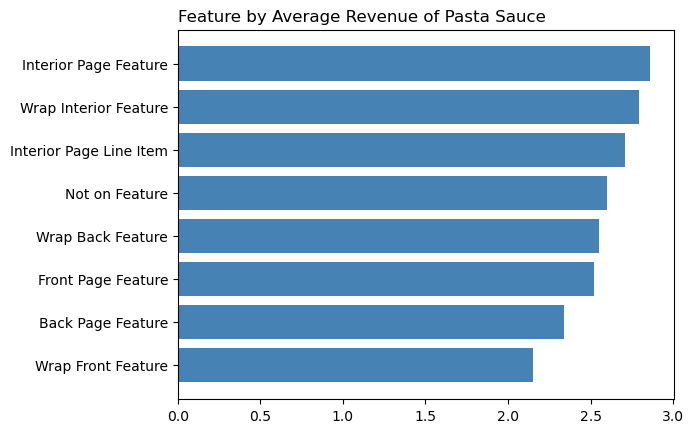

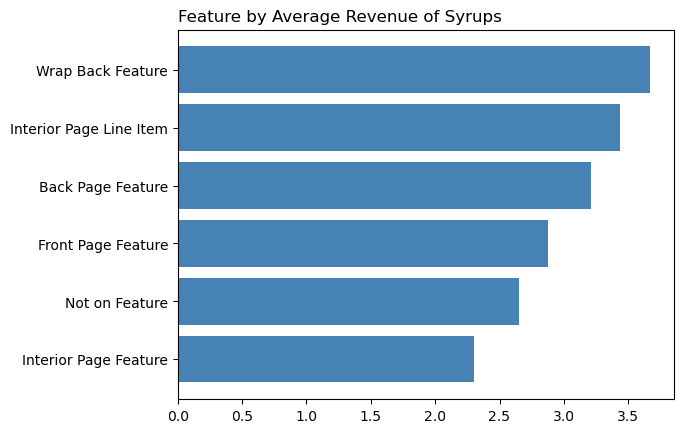

In [28]:
def intro6():
    x = feat1_pancake['feature']
    y = feat1_pancake['avg_revenue']
    plt.barh(x, y, color = 'steelblue')
    plt.title('Feature by Average Revenue of Pancake Mixes', loc='left');
    plt.show()

    x2 = feat1_pasta['feature']
    y2 = feat1_pasta['avg_revenue']
    plt.barh(x2, y2, color = 'steelblue')
    plt.title('Feature by Average Revenue of Pasta', loc='left');
    plt.show()
    
    x3 = feat1_sauce['feature']
    y3 = feat1_sauce['avg_revenue']
    plt.barh(x3, y3, color = 'steelblue')
    plt.title('Feature by Average Revenue of Pasta Sauce', loc='left');
    plt.show()
    
    x4 = feat1_syrups['feature']
    y4 = feat1_syrups['avg_revenue']
    plt.barh(x4, y4, color = 'steelblue')
    plt.title('Feature by Average Revenue of Syrups', loc='left');
    plt.show()

if __name__ == '__main__':
    intro6()

From the charts above, we found that
- Pancake mixes should not be featured, and they should be avoided as an interior page feature.
- Pasta should have a wrap front feature and, they should not be featured.
- Pasta sauce should have an interior page feature, and they should be avoided as a wrap front feature.
- Syrups should have a wrap back feature, and they should be avoided to interior page feature.

**Brand**

In [29]:
# group by brand
brand = round(data.groupby(['commodity', 'geography', 'brand'])['revenue'].mean().reset_index().sort_values('revenue', ascending = True), 2)
brand.columns = ['product', 'geo', 'brand', 'avg_revenue']
brand.head()

,product,geo,brand,avg_revenue
41,pasta,2,Wacky Mac,1.09
30,pasta,2,DaVinci,1.19
78,syrups,1,Private Label Value,1.26
24,pasta,1,Private Label Value,1.27
20,pasta,1,Kraft,1.33


In [30]:
# filter brand
brand_geo1 = brand[brand['geo'] == 1]
brand_geo2 = brand[brand['geo'] == 2]

In [31]:
# filter product in geo 1
brand1_pancake = brand_geo1[brand_geo1['product'] == 'pancake mixes']
brand1_pasta = brand_geo1[brand_geo1['product'] == 'pasta']
brand1_sauce = brand_geo1[brand_geo1['product'] == 'pasta sauce']
brand1_syrups = brand_geo1[brand_geo1['product'] == 'syrups']

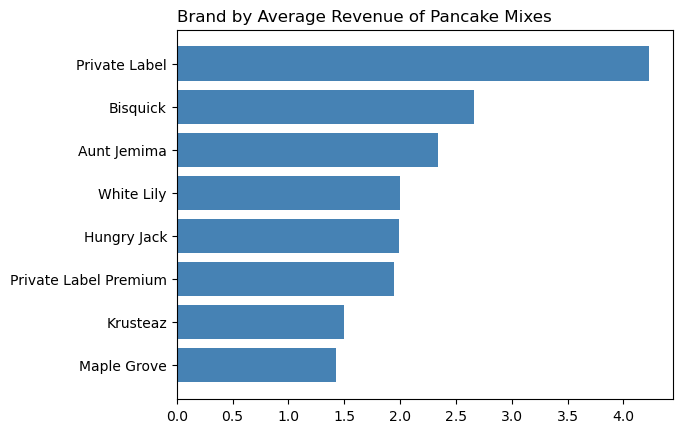

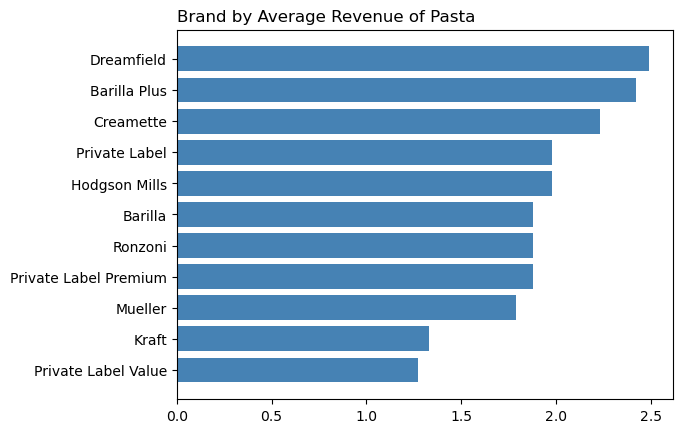

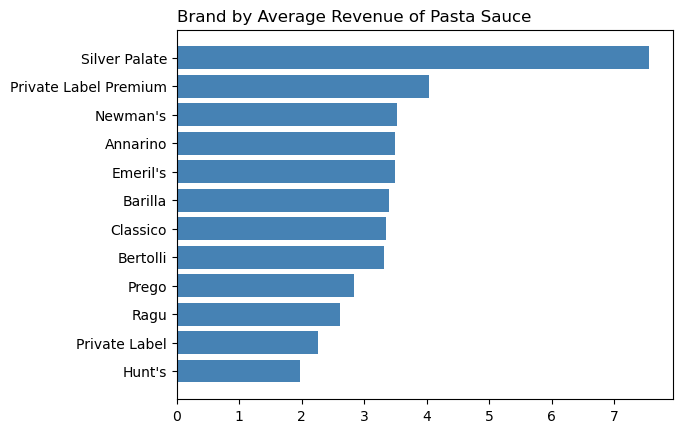

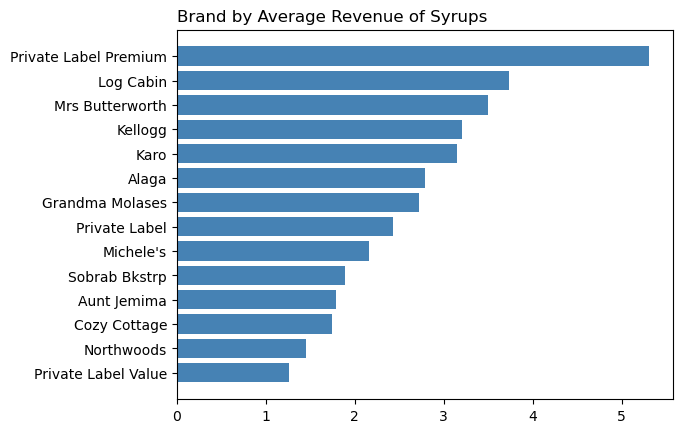

In [32]:
def intro9():
    x = brand1_pancake['brand']
    y = brand1_pancake['avg_revenue']
    plt.barh(x, y, color = 'steelblue')
    plt.title('Brand by Average Revenue of Pancake Mixes', loc='left');
    plt.show()

    x2 = brand1_pasta['brand']
    y2 = brand1_pasta['avg_revenue']
    plt.barh(x2, y2, color = 'steelblue')
    plt.title('Brand by Average Revenue of Pasta', loc='left');
    plt.show()
    
    x3 = brand1_sauce['brand']
    y3 = brand1_sauce['avg_revenue']
    plt.barh(x3, y3, color = 'steelblue')
    plt.title('Brand by Average Revenue of Pasta Sauce', loc='left');
    plt.show()
    
    x4 = brand1_syrups['brand']
    y4 = brand1_syrups['avg_revenue']
    plt.barh(x4, y4, color = 'steelblue')
    plt.title('Brand by Average Revenue of Syrups', loc='left');
    plt.show()

if __name__ == '__main__':
    intro9()

From the charts above, we found that
- Pancake mixes: Private Label  is the most popular brand and Maple Grove is the least popular brand
- Pasta: Dreamfield is the most popular brand and Private Label Value is the least popular brand
- Pasta sauce: Silver Palate is the most popular brand and Hunt’s is the least popular brand
- Syrups: Private Label Premium  is the most popular brand and Private Label Value is the least popular brand

We studied the products of Geography 1, and then next we will look at the charts of the products of Geography 2.

#### Geography 2

**Display**

In [33]:
# filter product in geo 2
dis2_pancake = dis_geo2[dis_geo2['product'] == 'pancake mixes']
dis2_pasta = dis_geo2[dis_geo2['product'] == 'pasta']
dis2_sauce = dis_geo2[dis_geo2['product'] == 'pasta sauce']
dis2_syrups = dis_geo2[dis_geo2['product'] == 'syrups']

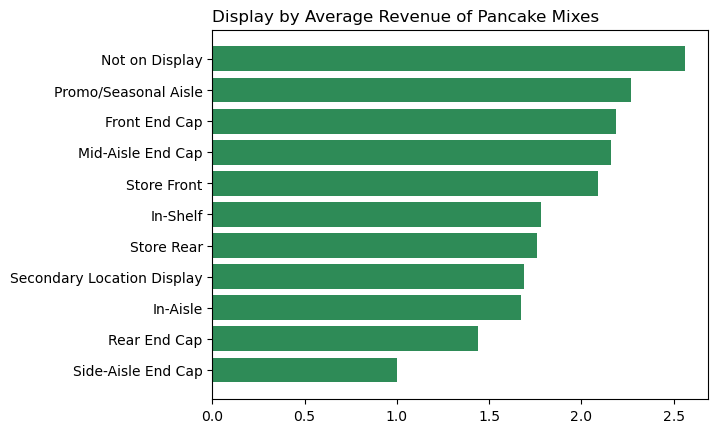

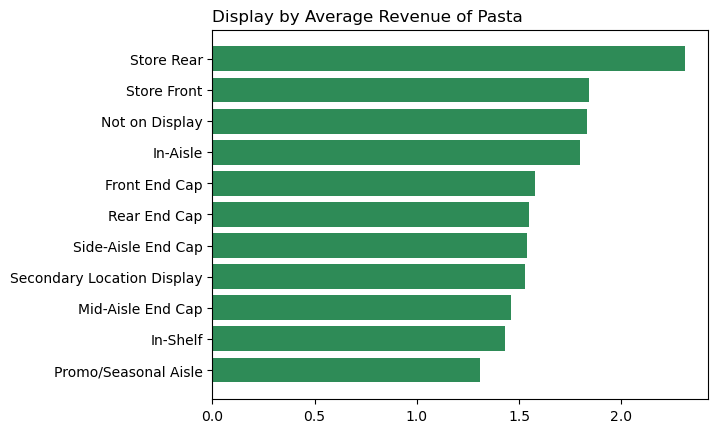

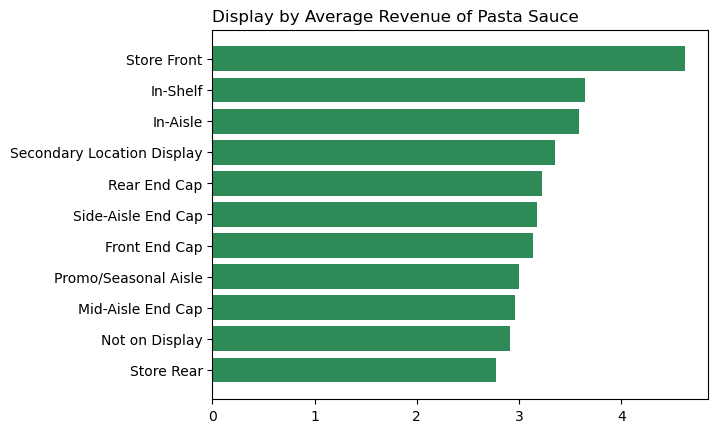

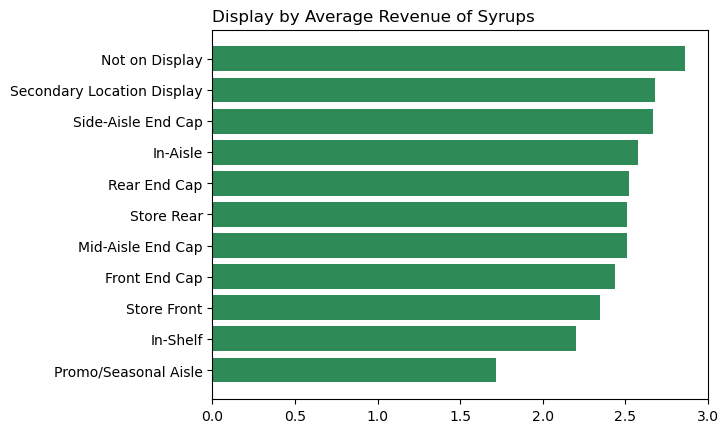

In [35]:
# plot graph
def intro7():
    x = dis2_pancake['display']
    y = dis2_pancake['avg_revenue']
    plt.barh(x, y, color = 'seagreen')
    plt.title('Display by Average Revenue of Pancake Mixes', loc='left');
    plt.show()

    x2 = dis2_pasta['display']
    y2 = dis2_pasta['avg_revenue']
    plt.barh(x2, y2, color = 'seagreen')
    plt.title('Display by Average Revenue of Pasta', loc='left');
    plt.show()
    
    x3 = dis2_sauce['display']
    y3 = dis2_sauce['avg_revenue']
    plt.barh(x3, y3, color = 'seagreen')
    plt.title('Display by Average Revenue of Pasta Sauce', loc='left');
    plt.show()
    
    x4 = dis2_syrups['display']
    y4 = dis2_syrups['avg_revenue']
    plt.barh(x4, y4, color = 'seagreen')
    plt.title('Display by Average Revenue of Syrups', loc='left');
    plt.show()

if __name__ == '__main__':
    intro7()

From the charts above, we found that
- Pancake mixes should not be on display, and they should be avoided at side-aisle end cap.
- Pasta should be kept in the rear of the store, and they should be avoided at promo/seasonal aisle.
- Pasta sauce should be at the store front, and they should be avoided to keep them in the rear of the store.
- Syrups should not be on display, and they should be avoided at promo/seasonal aisle.

**Feature**

In [36]:
# filter product in geo 2
feat2_pancake = feat_geo2[feat_geo2['product'] == 'pancake mixes']
feat2_pasta = feat_geo2[feat_geo2['product'] == 'pasta']
feat2_sauce = feat_geo2[feat_geo2['product'] == 'pasta sauce']
feat2_syrups = feat_geo2[feat_geo2['product'] == 'syrups']

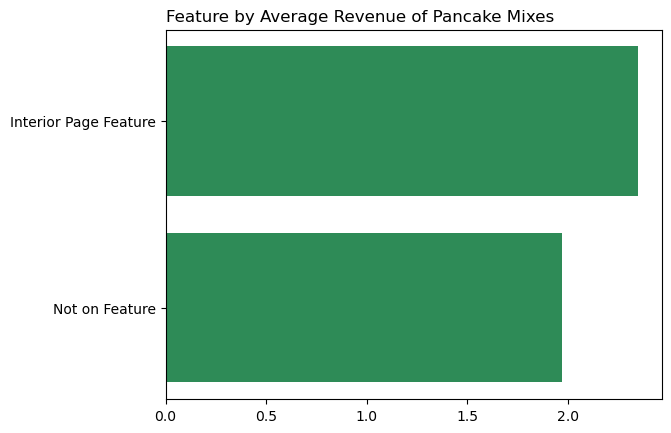

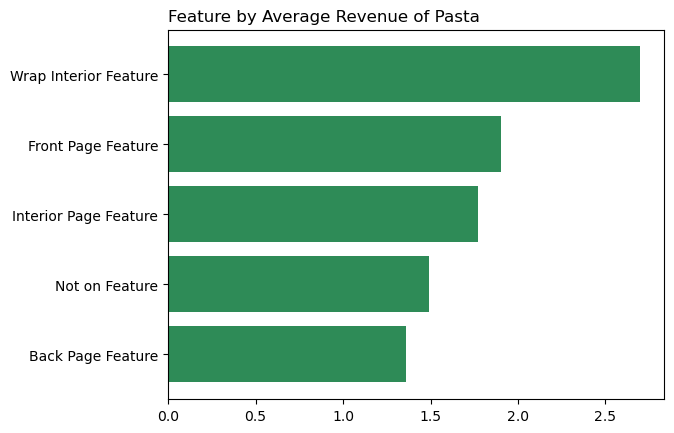

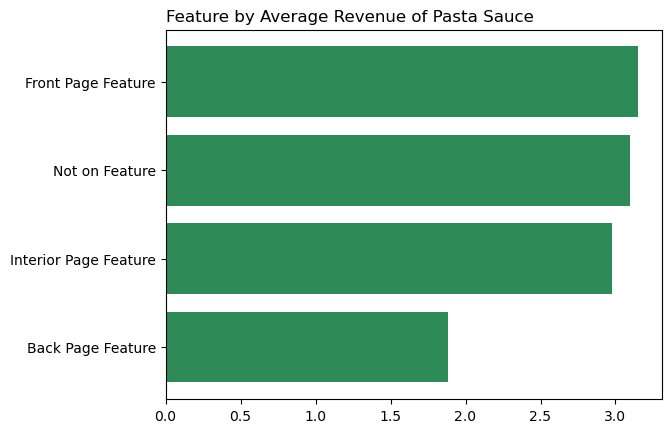

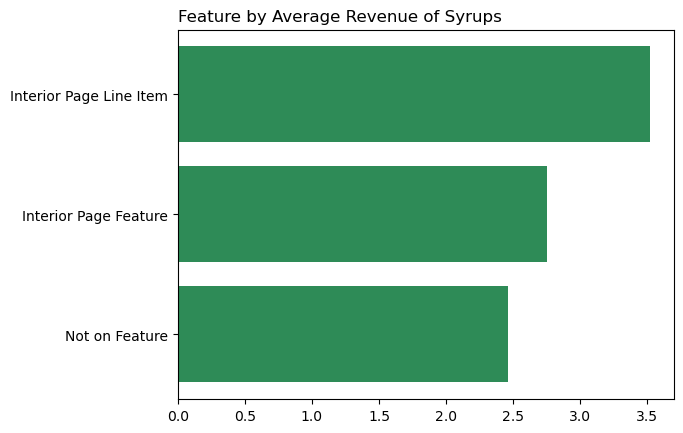

In [37]:
def intro8():
    x = feat2_pancake['feature']
    y = feat2_pancake['avg_revenue']
    plt.barh(x, y, color = 'seagreen')
    plt.title('Feature by Average Revenue of Pancake Mixes', loc='left');
    plt.show()

    x2 = feat2_pasta['feature']
    y2 = feat2_pasta['avg_revenue']
    plt.barh(x2, y2, color = 'seagreen')
    plt.title('Feature by Average Revenue of Pasta', loc='left');
    plt.show()
    
    x3 = feat2_sauce['feature']
    y3 = feat2_sauce['avg_revenue']
    plt.barh(x3, y3, color = 'seagreen')
    plt.title('Feature by Average Revenue of Pasta Sauce', loc='left');
    plt.show()
    
    x4 = feat2_syrups['feature']
    y4 = feat2_syrups['avg_revenue']
    plt.barh(x4, y4, color = 'seagreen')
    plt.title('Feature by Average Revenue of Syrups', loc='left');
    plt.show()

if __name__ == '__main__':
    intro8()

From the charts above, we found that
- Pancake mixes should have an interior page feature, and they should be avoided not be featured.
- Pasta should have a wrap interior feature and, they should be avoided back page feature.
- Pasta sauce should have a front page feature, and they should be avoided as a back page feature.
- Syrups should have an interior page line item, and they should not be featured.

From past charts, it can be concluded that not all products are suitable for on-shelf or front-page features.

**Brand**

In [38]:
# filter product in geo 2
brand2_pancake = brand_geo2[brand_geo2['product'] == 'pancake mixes']
brand2_pasta = brand_geo2[brand_geo2['product'] == 'pasta']
brand2_sauce = brand_geo2[brand_geo2['product'] == 'pasta sauce']
brand2_syrups = brand_geo2[brand_geo2['product'] == 'syrups']

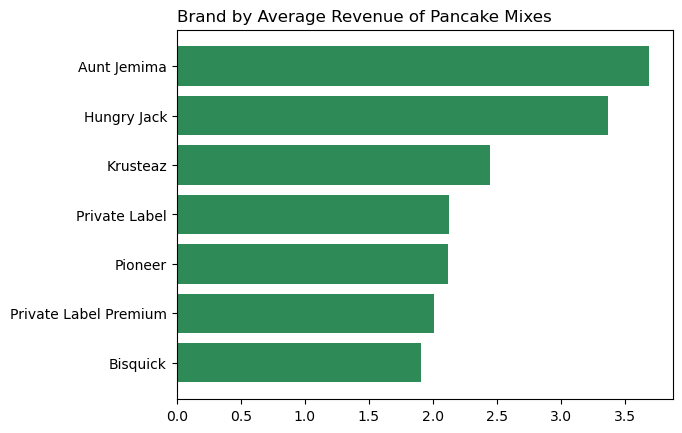

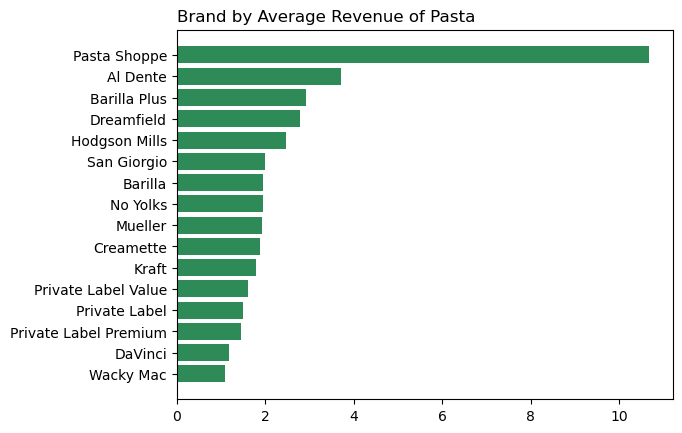

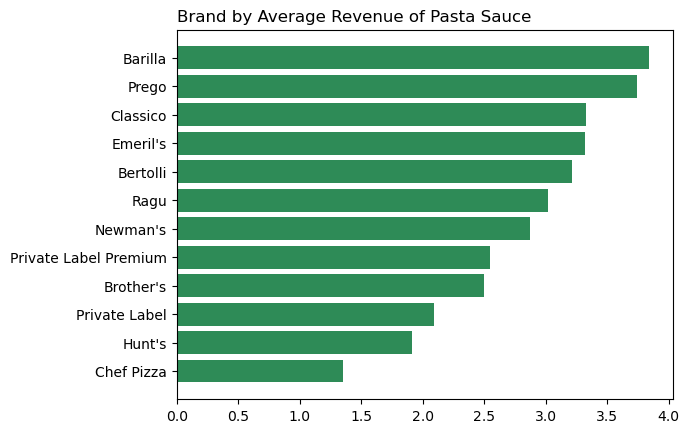

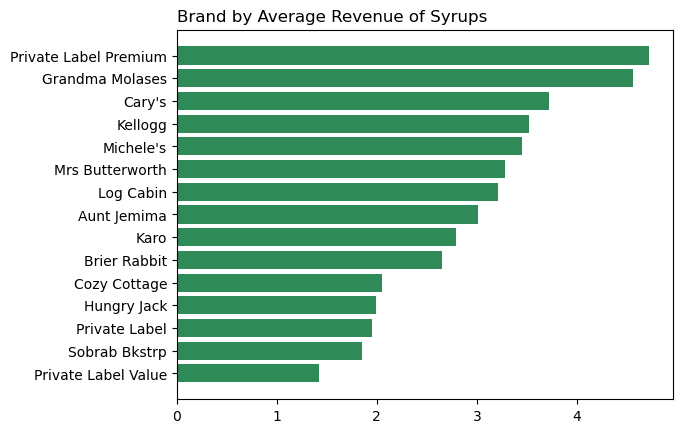

In [39]:
def intro10():
    x = brand2_pancake['brand']
    y = brand2_pancake['avg_revenue']
    plt.barh(x, y, color = 'seagreen')
    plt.title('Brand by Average Revenue of Pancake Mixes', loc='left');
    plt.show()

    x2 = brand2_pasta['brand']
    y2 = brand2_pasta['avg_revenue']
    plt.barh(x2, y2, color = 'seagreen')
    plt.title('Brand by Average Revenue of Pasta', loc='left');
    plt.show()
    
    x3 = brand2_sauce['brand']
    y3 = brand2_sauce['avg_revenue']
    plt.barh(x3, y3, color = 'seagreen')
    plt.title('Brand by Average Revenue of Pasta Sauce', loc='left');
    plt.show()
    
    x4 = brand2_syrups['brand']
    y4 = brand2_syrups['avg_revenue']
    plt.barh(x4, y4, color = 'seagreen')
    plt.title('Brand by Average Revenue of Syrups', loc='left');
    plt.show()

if __name__ == '__main__':
    intro10()

From the charts above, we found that
- Pancake mixes: Aunt Jemima is the most popular brand and Bisquick is the least popular brand
- Pasta: Pasta Shoppe is the most popular brand and Wacky Mac is the least popular brand
- Pasta sauce: Barilla is the most popular brand and Chef Pizza is the least popular brand
- Syrups: Private Label Premium  is the most popular brand and Private Label Value is the least popular brand

### Step 3: Summary

In conclusion, at first we looked at the total revenue and average revenue overview from both geographies and then delved into each geography and each product. In order to improve the food retail business, we summarize the insights found as follows:

- After more than a year of data collection, Geo 2 generates more revenue and sales than Geo 1, so it is better suited for marketing investments
- For Geo 1, you should invest in pancake mixes; for Geo 2, you should invest in pasta sauce products
- The least popular product in both Geo 1 and Geo 2 is pasta
- Timing has no effect with sales
- Syrups should not be on display in both Geo 1 and Geo 2 because of the highest average revenue
- The premium private label brand syrup is popular with both Geo 1 and Geo 2, while the private label value brand syrup is not popular with both
- Promo/Seasonal Aisle should not be applied to pasta products in both Geo 1 and Geo 2 because of the lowest average revenue
- You can see what features and displays are suitable for each product on this link(https://drive.google.com/file/d/1LX3VUZO71N7HsRBKD69rfvI2xF2keljT/view?usp=share_link)